In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
"""
nbits = 10 #cantidad de bits de mi señal
bits = np.random.binomial(n = 1, p = 0.5, size = 10)#secuencia de bits de mi señal
nmuestras = 1000 #cantidad de muestras de mi señal
T = 1 #duración de cada pulso en segundos. Con 10 bit mi señal dura 10 segundos
t = np.linspace(start = 0, stop = nbits * T, num = nmuestras) #eje de tiempo
T0 = np.random.uniform(low = 0, high = T) #desplazamiento

X = np.zeros(t.shape)


for i in range(nbits):
    #donde i*T < t < (i + 1) * T ==> X[] = bits[i]
    condicion = (i * T <= t) & (t < (i + 1) * T)
    X[condicion] = bits[i]

muestras_por_segundo = nmuestras/(nbits * T)
X = np.roll(X, int(T0 * muestras_por_segundo))
X = 2*X - 1
"""

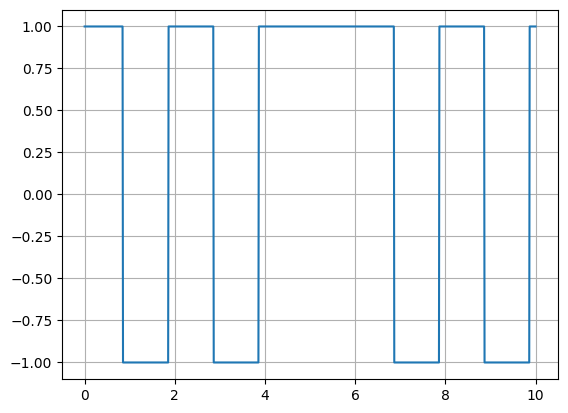

In [20]:
plt.plot(t, X)

plt.grid(True)
plt.show()

In [78]:
#Si quiero estimar la media, tengo que generar varias realizaciones de X
nbits = 10 #cantidad de bits de mi señal
nmuestras = 10000 #cantidad de muestras de mi señal
T = 1 #duración de cada pulso en segundos. Con 10 bit mi señal dura 10 segundos
t = np.linspace(start = 0, stop = nbits * T, num = nmuestras) #eje de tiempo
muestras_por_segundo = nmuestras/(nbits * T)

Realizaciones = 100

X = np.zeros((Realizaciones, nmuestras))#matriz de 100 X 1000
print(X.shape)

for i in range(Realizaciones):
    bits = np.random.binomial(n = 1, p = 0.5, size = nbits)
    bits = 2 * bits - 1
    T0 = np.random.uniform(low = 0, high = T)
    #T0 = 0 #descomentar/comentar para sacar/poner el corrimeinto
    for k in range(nbits):
        condicion = (k * T <= t) & (t < (k + 1) * T)
        X[i][condicion] = bits[k]
    X[i] = np.roll(X[i], int(T0 * muestras_por_segundo))


(100, 10000)


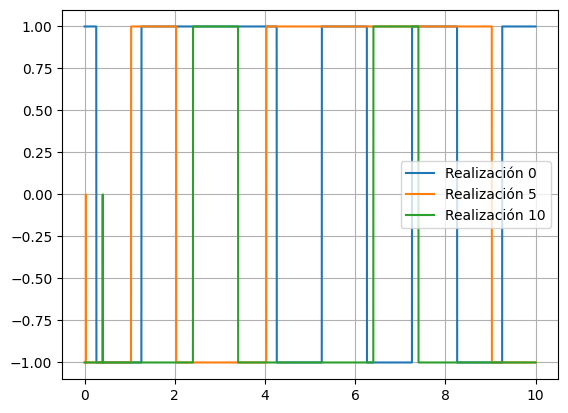

In [79]:
for i in [0, 5, 10]:
    plt.plot(t, X[i], label = f'Realización {i}')

plt.legend()
plt.grid(True)
plt.show()

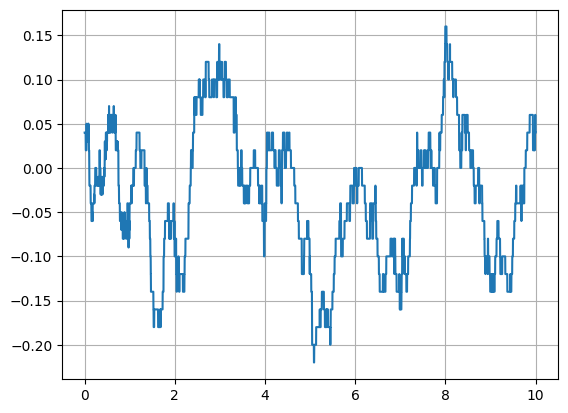

In [80]:
media = np.mean(X, axis = 0)

plt.plot(t, media)

plt.grid(True)
plt.show()

[-9999 -9998 -9997 ...  9997  9998  9999]


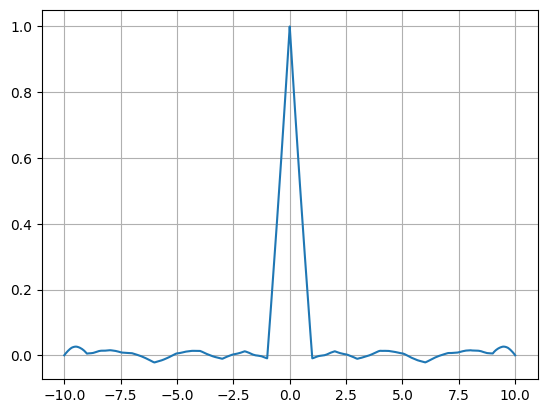

In [81]:
#por cada realización hago una autocorr. Luego promedio todas las autocorr.
def estimar_R(X):
    R = (1/len(X)) * np.correlate(X, X, mode = 'full')
    return R

R_matriz = np.zeros((Realizaciones, 2 * nmuestras - 1))

for i in range(Realizaciones):
    R_matriz[i] = estimar_R(X[i])

R = np.mean(R_matriz, axis = 0)

tau = np.arange(start = - (nmuestras - 1), stop = nmuestras)
print(tau)
segundos_por_muestra = 1/muestras_por_segundo
tau = tau * segundos_por_muestra
#La lógica de esto es la siguiente: yo estoy estimando la autocorrelación como si se tratara de una señal discreta
#R(1) es avanzar una muestra ¿A cuántos segundos corresponde eso? 1 * segundos_por_muestra
#Repetir eso para todo avance/retroceso

plt.plot(tau, R)

#plt.xlim(-2, 2)

plt.grid(True)
plt.show()

### Moy bueno